# Evaluation

***

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

Keras is an open-source software library that provides a Python interface for ANNs (Artificial Neural Networks). It is designed to be user-friendly, modular, and extensible, allowing developers to create and experiment with various neural network architectures in a fast and efficient manner. It is built on top of other popular machine learning libraries, such as TensorFlow and Theano, and it provides a high-level interface for defining and training neural networks. It is especially well-suited for deep learning tasks, as it allows users to easily define and train complex models with many layers. https://keras.io/

Keras is widely used in the field of deep learning, and it has gained popularity due to its simplicity and ease of use. It is used by researchers and practitioners in a variety of fields, including natural language processing, computer vision, and robotics.

Anomaly detection in time series refers to the identification of unusual patterns in a time series data that do not conform to expected behavior. It is an important task in various fields such as finance, manufacturing, and cybersecurity, as it can help identify unusual events or behavior that may require further investigation. Anomaly detection in time series typically involves analyzing the data to identify patterns and trends, and then using this information to detect deviations from the expected patterns. This can be done using statistical techniques, machine learning algorithms, or a combination of both. https://valueml.com/anomaly-detection-in-time-series-data-using-keras/



<br />










An autoencoder consists of two parts: an encoder and a decoder. The encoder maps the input data to a lower-dimensional representation, called the latent representation, while the decoder maps the latent representation back to the original input space. The goal of training an autoencoder is to learn a function that can reconstruct the input data accurately, such that the difference between the input and the reconstructed output is minimized.

To detect anomalies in time series data using an autoencoder, we can train the autoencoder on a normal or "healthy" time series and then use it to reconstruct new time series data points. If the reconstruction error, or the difference between the input and the reconstructed output, is significantly higher for a particular time series data point, it may indicate that the data point is an anomaly. https://blog.keras.io/building-autoencoders-in-keras.html



Here is a general outline of how an autoencoder is being used to detect anomalies in time series data in this notebook:

-Time series data is preprocessed to make it suitable for training an autoencoder. This will involve normalizing the data, handling missing values, and so on.

-Preprocessed time series data is split into training and validation sets. The training set will be used to train the autoencoder, while the validation set will be used to evaluate its performance.

-The autoencoder is trained on the training set. This involves optimizing the weights and biases of the encoder and decoder to minimize the reconstruction error.

-The trained autoencoderis used to reconstruct the time series data points in the validation set. Calculate the reconstruction error for each data point.

-A threshold is set for the reconstruction error above which a data point is considered an anomaly. Data points with reconstruction error above the threshold can be flagged as anomalies.

-Use the trained autoencoder to detect anomalies in new time series data.

It is worth noting that autoencoder-based anomaly detection is sensitive to the quality and diversity of the training data. It is important to ensure that the training data represents a wide range of normal behaviors, so that the autoencoder can learn to reconstruct them accurately.

In [2]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

# Plotting
import matplotlib.pyplot as plt

## Data

***

https://www.kaggle.com/datasets/boltzmannbrain/nab

https://github.com/numenta/NAB

The script defines a few variables containing URLs that point to time series data stored on a remote server. The data is stored in CSV format and includes both "normal" time series data (art_daily_small_noise.csv) and time series data with anomalies (art_daily_jumpsup.csv).

In [3]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [4]:
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [5]:
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

In [6]:
# Load a small dataset with no anomalies from a URL
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [7]:
#  Print the first few rows of the dataframe
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [8]:
# Generate descriptive statistics
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [9]:
# Print the first row of the dataframe. Pandas is automatically rounding the value
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

In [10]:
# Print value from first row of the dataframe
df_small_noise.iloc[0]['value']

18.3249185392

In [11]:
# print the first value 
df_small_noise.iloc[0].values[0]

18.3249185392

In [12]:
#  
df_small_noise.iloc[0].values[0] * 10e12

183249185392000.0

In [13]:
# print shape of the df
df_small_noise.shape

(4032, 1)

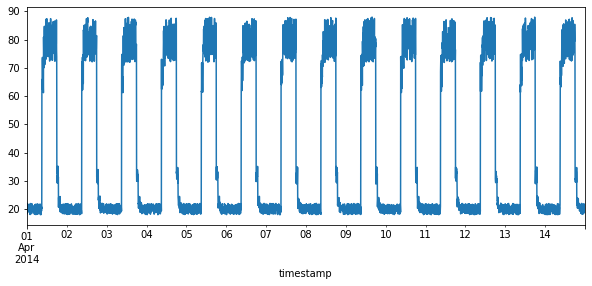

In [14]:
# plot the dataframe with no anomalies
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax);

In [15]:
# read the csv file, parse the timestamps in the file as dates and times
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [16]:
# show first few values of the dataframe
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [17]:
# show descriptive stats of the df
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [18]:
# Print value from first row of the dataframe
df_daily_jumpsup.iloc[0]['value']

19.761251903

In [19]:
# print shape of the df
df_daily_jumpsup.shape

(4032, 1)

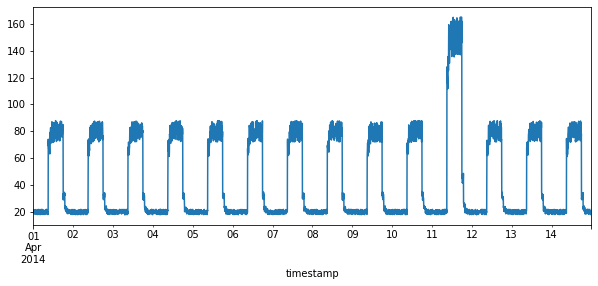

In [20]:
# plot dataframe with anomalies
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

## Preprocessing

***

One important aspect of working with neural networks is data preprocessing, which refers to the process of preparing the data for training and evaluation. This can involve a variety of tasks, such as cleaning and formatting the data, normalizing numerical values, and encoding categorical values. It is a very important task as the raw data may be unclean, it may be missing the attributes, it may contain noise, wrong or duplicate data. https://valueml.com/anomaly-detection-in-time-series-data-using-keras/

The script preprocesses the data by normalizing the value column in each DataFrame using the mean and standard deviation of the value column. This is done using the following steps:

-Calculate the mean and standard deviation of the value column using the mean() and std() methods.

-Subtract the mean from each value in the value column and divide by the standard deviation.

-Store the resulting values in a new df_train_vals DataFrame.

In [21]:
# The mean of the data is calculated
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [22]:
# Calculate standard deviation
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

In [23]:
# subtract the mean and divide by the standard deviation
df_train_vals = (df_small_noise - train_mean) / train_std

This transformation is commonly known as normalization and can be useful for scaling the data so that it has zero mean and unit variance.

In [24]:
# show first few values of df
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [25]:
# Create two new columns in the DataFrame: less_mean and div_std
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

The less_mean column is the difference between the value column and its mean, while the div_std column is the result of dividing less_mean by the standard deviation of the value column.

By subtracting the mean and dividing by the standard deviation, you are normalizing the data so that it is expressed in terms of standard deviations from the mean. This can make it easier to identify values that are significantly different from the majority of the data.

In [26]:
# show the df
df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [27]:
# mean for each column 
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [28]:
# std dev for each column
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000018)

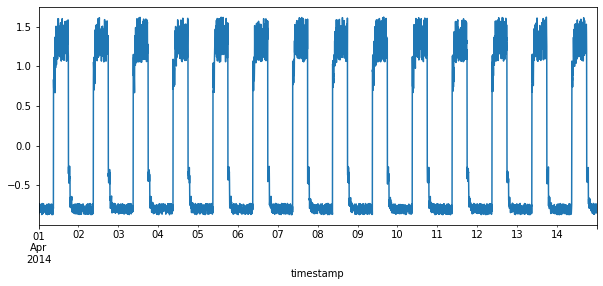

In [29]:
# Plot the standardized data
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

In [30]:
# Print shape of
df_train_vals.shape

(4032, 1)

In time series anomaly detection, a window refers to a fixed-size subset of the data. A sliding window is a window that moves forward through the data by a certain time increment, allowing you to perform some operation on the data within the window at each step.

For example, you might use a sliding window to calculate the mean and standard deviation of the data within the window at each time step, and then use these values to identify anomalies in the data. By using a sliding window, you can identify anomalies in the data that may not be apparent if you were to only analyze the data as a whole or only look at indivdual values.

In [31]:
# amount of values per window
window_size = 288

Example of using windows:

```python
[1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
window_size = 3
[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
...
```

In [32]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)

12

In [33]:
# Number of windows from L.
len(L) - (win_size - 1)

10

In [34]:
# Remove brackets.
len(L) - win_size + 1

10

In [35]:
# Print the windows.
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [36]:
# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [37]:
# Create a 2D numpy array from wins.
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [38]:
# create a list of sliding windows of size N from the input vals
def windows(vals, N=window_size):
  # empty list
  L = []
  # the number of windows is equal to the number of values minus the last and second last value
  for i in range(len(vals) - N + 1):
    # appends a slice of vals to L
    L.append(vals[i:i+N])
  # Stack
  return np.stack(L)

In [39]:
# apply the sliding windows to the training values
x_train = windows(df_train_vals)

In [40]:
# print first value of first window and last value of last window
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [41]:
# showing that the values in x_train and df_train_vals are the same
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

In [42]:
# show number of windows and number of values in each window
x_train.shape

(3745, 288, 1)

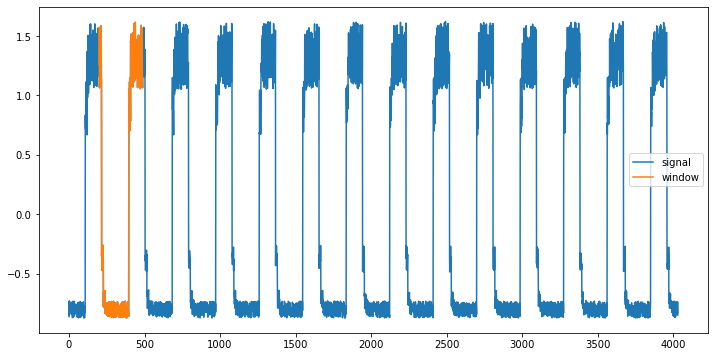

In [45]:
# visually demonstrate the window on the training values
# amount of values per window
window_no = 200

# create a new figure object and an axis object, which are used to plot the data.
fig, ax = plt.subplots(figsize=(12, 6))

# training values
y = df_train_vals['value'].values

# plot training values
ax.plot(np.arange(y.shape[0]), y, label='signal')

# The first window.
w = x_train[window_no].flatten()

# plots the first window on the axis object ax. The x-values are generated in a similar way as before, 
# but this time they are shifted by the value of window_no using the + operator. 
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();

## Neural Network

***

Finally, the script defines a simple autoencoder model  and trains it on the windowed version of the df_train_vals DataFrame. The autoencoder is then used to reconstruct the time series data in the validation set, and the reconstruction error is calculated for each data point. Data points with reconstruction error above a certain threshold are flagged as anomalies. The script then plots the original data and the reconstructed data, as well as the reconstruction error, to visualize the results of the anomaly detection.

In [46]:
x_train.shape

(3745, 288, 1)

In [47]:
#  This code defines a list of layers
layers = [
  #  instantiate a Keras tensor
  #  # The shape of the tensor is the shape of the training data, with dimensions 1 and 2.
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  # one-dimensional convolutional layer
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  # Dropout layer with a rate of 0.2
  # This layer randomly sets 
  # a fraction of input units to 0 at each update during training, which helps prevent overfitting. https://keras.io/api/layers/regularization_layers/dropout/
  keras.layers.Dropout(rate=0.2),
  # one-dimensional convolutional layer
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  # Conv1DTranspose layer, which performs upsampling on the input data. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1DTranspose
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  # The sixth layer is a Dropout layer with a rate of 0.2.
  keras.layers.Dropout(rate=0.2),
  # Conv1DTranspose layer
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  # Conv1DTranspose layer
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In Keras, the Input function is used to instantiate a Keras tensor. A Keras tensor is a symbolic representation of a tensor-like object, which we augment with certain attributes that allow us to build a Keras model just by knowing the inputs and outputs of the model. https://keras.io/api/layers/core_layers/input/

A layer is a class that represents a certain operation to be performed on the input data. Layers can be thought of as the building blocks of a Keras model, and can be combined in different ways to create a deep learning model. https://keras.io/api/layers/

There are many types of layers available in Keras, including:

-Dense layers, which are fully connected layers

-Convolutional layers, which are used for processing data with a grid-like topology

-Recurrent layers, which are used for processing sequential data

-Transpose convolution layers, which are used for upsampling data

-Pooling layers, which are used for down-sampling data

A Conv1D layer is a one-dimensional convolutional layer that is used for processing sequences of data, such as one-dimensional arrays or time series. This layer convolves the input data with a set of filters, each of which is learned during training, to produce a set of output data.

In [48]:
# creates a Keras sequential model and specifies the layers defined in the previous code block as the layers for the model. https://keras.io/api/models/sequential/
model = keras.Sequential(layers)

In [49]:
# Creates an Adam optimizer with a learning rate of 0.001.
optimizer = keras.optimizers.Adam(learning_rate=0.001)

The Adam optimizer is a gradient-based optimization algorithm that can be used to update the model's weights during training. https://keras.io/api/optimizers/adam/

In [50]:
# Compiles the model by specifying the optimizer and the loss function to use.
model.compile(optimizer=optimizer, loss="mse")

The optimizer will be used to update the model weights during training, and the loss function will be used to evaluate the model's performance. In this case, the mean squared error (MSE) loss function is used.

Mean squared error (MSE) is a measure of the difference between the predicted values and the true values in a dataset. It is used to evaluate the performance of a machine learning model. MSE is calculated by taking the sum of the squared differences between the predicted values and the true values, and then dividing by the number of samples in the dataset. The resulting value represents the average squared difference between the predicted and true values.

The goal is to minimize the MSE in order to improve the model's prediction performance. It is a popular choice for loss functions because it is differentiable and easy to optimize using techniques such as gradient descent. However, MSE is sensitive to outliers, as large errors will have a disproportionate impact on the overall MSE value. This can be mitigated by using a loss function such as the mean absolute error (MAE), which is less sensitive to outliers. https://en.wikipedia.org/wiki/Mean_squared_error

In [51]:
# prints a summary of the model's layers, output shapes, and number of parameters.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

In [52]:
# trains the model on the training data as input and output using the fit() method.
# the EarlyStopping callback is used to stop the training early if the validation loss does not improve after a 
# certain number of epochs (specified by the patience argument).
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 5s 117ms/step - loss: 0.5589 - val_loss: 0.0797
Epoch 2/50
27/27 [==============================] - 3s 98ms/step - loss: 0.0839 - val_loss: 0.0395
Epoch 3/50
27/27 [==============================] - 3s 98ms/step - loss: 0.0581 - val_loss: 0.0332
Epoch 4/50
27/27 [==============================] - 3s 98ms/step - loss: 0.0486 - val_loss: 0.0287
Epoch 5/50
27/27 [==============================] - 3s 99ms/step - loss: 0.0428 - val_loss: 0.0257
Epoch 6/50
27/27 [==============================] - 3s 119ms/step - loss: 0.0386 - val_loss: 0.0239
Epoch 7/50
27/27 [==============================] - 3s 120ms/step - loss: 0.0350 - val_loss: 0.0228
Epoch 8/50
27/27 [==============================] - 3s 119ms/step - loss: 0.0319 - val_loss: 0.0211
Epoch 9/50
27/27 [==============================] - 4s 161ms/step - loss: 0.0294 - val_loss: 0.0192
Epoch 10/50
27/27 [==============================] - 258s 10s/step - loss: 0.0273 - val_loss: 0.0185
Epo

The model is trained for 50 epochs (iterations over the entire training dataset), with a batch size of 128 (the number of samples per gradient update). The training process is set to run until the validation loss stops improving for 5 epochs using an early stopping callback. The validation_split parameter specifies the fraction of the training data to be used for validation, in this case 10%.

During training, the model will iterate over the training data, applying the layers in the model to the input data and using the optimizer to update the model weights based on the calculated loss. The model's performance will be evaluated on the validation set at the end of each epoch and the results will be logged in the history object returned by the fit() method. This object can be used to plot the training and validation loss and accuracy over time, which can be useful for analyzing the model's training process and identifying overfitting or underfitting.

## Evaluation

***

In [53]:
# retrieves the list of training loss values recorded during the training process
history.history["loss"]

[0.558883011341095,
 0.08390140533447266,
 0.058125995099544525,
 0.04858787730336189,
 0.04284460097551346,
 0.03859386220574379,
 0.0349794365465641,
 0.03188213333487511,
 0.029373927041888237,
 0.02727406844496727,
 0.025429178029298782,
 0.02404918521642685,
 0.022789934650063515,
 0.021802539005875587,
 0.020697832107543945,
 0.019913436844944954,
 0.01907232031226158,
 0.018140753731131554,
 0.017422303557395935,
 0.016637517139315605,
 0.01599125750362873,
 0.015308883041143417,
 0.014739195816218853,
 0.014185009524226189,
 0.013697966933250427,
 0.013258250430226326]

In [54]:
# retrieve the list of validation loss values
history.history["val_loss"]

[0.07965388149023056,
 0.03947071358561516,
 0.03320853039622307,
 0.02872765064239502,
 0.025685187429189682,
 0.023907704278826714,
 0.0227709598839283,
 0.02108161896467209,
 0.019247429445385933,
 0.018482735380530357,
 0.0180740375071764,
 0.017071885988116264,
 0.01668436825275421,
 0.017174378037452698,
 0.016546666622161865,
 0.015187013894319534,
 0.01566588506102562,
 0.01575378328561783,
 0.015713786706328392,
 0.016137009486556053,
 0.01413212064653635,
 0.014623268507421017,
 0.015229192562401295,
 0.015359687618911266,
 0.015487453900277615,
 0.016570493578910828]

After training, the code plots the training and validation loss values using Matplotlib. This can be used to evaluate the performance of the model and identify any issues such as overfitting.

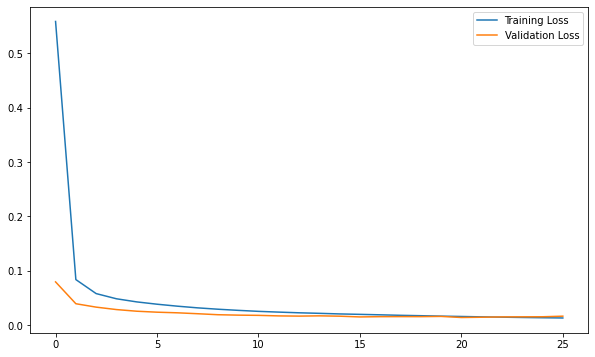

In [55]:
# plot the training and validation loss values
fig, ax = plt.subplots(figsize=(10, 6))

# plot training loss
ax.plot(history.history["loss"], label="Training Loss")
# plot Validation loss
ax.plot(history.history["val_loss"], label="Validation Loss")

# display a legend for the plot
ax.legend();

The purpose of generating predictions for the training data is typically to evaluate the model's performance. You can compare the predicted values to the true values to assess the accuracy of the model. One common metric for evaluating the performance of a regression model is the mean absolute error (MAE), which is the average absolute difference between the predicted and true values. You can calculate the MAE loss for the training data by taking the mean absolute difference between x_train_pred and x_train.

In [56]:
# predict the values using the training values
x_train_pred = model.predict(x_train)

118/118 [==============================] - 2s 13ms/step


In [57]:
# Calculate loss getting the mean of the absolute difference between the expected and predicted values
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

As previously mentioned, the MAE loss can be used as a metric to evaluate the performance of the model. A smaller MAE loss indicates that the model is making more accurate predictions, while a larger MAE loss indicates that the model's predictions are less accurate. By comparing the MAE loss for the training data to the MAE loss for the validation or test data, you can assess the model's generalization ability and identify any potential issues such as overfitting. https://en.wikipedia.org/wiki/Mean_absolute_error

A histogram plotting the mean absolute error (MAE) can be used to visualize the distribution of error in the model's predictions. 

If the histogram is centered around a small MAE value and has a narrow spread, it suggests that the model is making relatively accurate predictions. On the other hand, if the histogram is centered around a large MAE value or has a wide spread, it suggests that the model's predictions are less accurate.

By examining the shape and characteristics of the MAE histogram, you can get a sense of the model's overall performance and identify any potential issues such as bias or variance. You can also use the MAE histogram to compare the performance of different models or to evaluate the effect of changes to the model or the data on the model's accuracy.

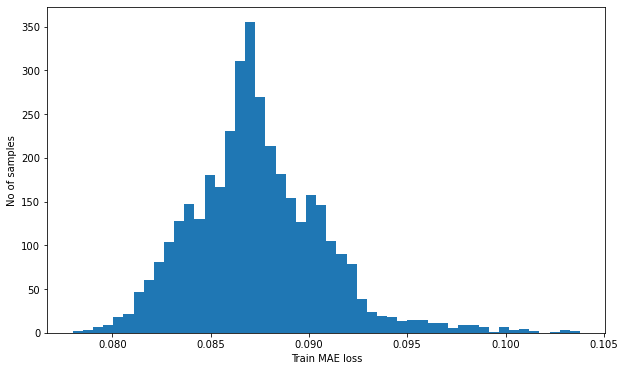

In [58]:
# plot a histogram of the training mean absolute error (MAE) loss values.
fig, ax = plt.subplots(figsize=(10, 6))

# plot hist
ax.hist(train_mae_loss, bins=50)

# set the x-axis label
ax.set_xlabel("Train MAE loss")
# set the y-axis label
ax.set_ylabel("No of samples");

To evaluate a MAE histogram, you should look at the overall shape of the distribution, the range of the errors, and the magnitude of the errors, and consider how these factors relate to the context and goals of the problem.

The histogram seems to have a normal distribution, with most of the errors concentrated around the mean and a symmetrical spread. This is desirable as it indicates that the model is making consistent errors. However, it does seem to be positively skewed. There is also a fairly large range of mae values, which it indicates that the model is making relatively inconsistent errors across the dataset.

The magnitude of the MAE values should also be considered. A smaller MAE is generally better, as it indicates that the model is making smaller errors on average. 







In [59]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# print threshold
threshold

0.10378565694099415

Reconstruction loss is a measure of how well a model is able to reconstruct a given input using a learned representation of the data. The reconstruction loss threshold is a value that is used to determine whether a given input is an anomaly or not. If the reconstruction loss for an input is greater than the threshold, the input is considered an anomaly. The threshold value is typically chosen based on the needs of the application and the characteristics of the data. It may be set based on the expected range of reconstruction losses for normal data, or it may be set based on a desired false positive rate or false negative rate.

Anomalies are data points where the reconstruction loss is higher than the threshold https://towardsdatascience.com/anomaly-detection-using-autoencoders-5b032178a1ea

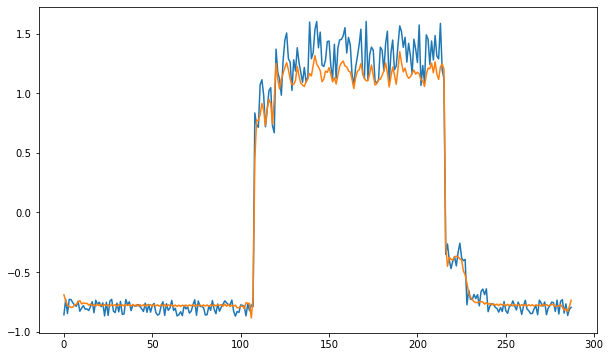

In [60]:
# plot training set against what the neural network is predicting
fig, ax = plt.subplots(figsize=(10, 6))

# plot training set
ax.plot(x_train[0])

# plot predictions
ax.plot(x_train_pred[0]);

In [61]:
# normalize the data containing anomalies
df_test_value = (df_daily_jumpsup - train_mean) / train_std

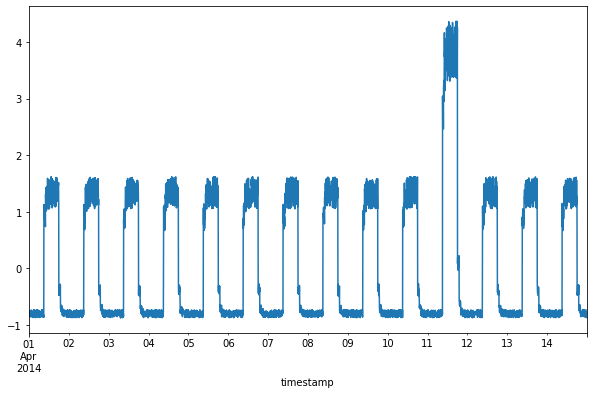

In [62]:
# plot noramized data
fig, ax = plt.subplots(figsize=(10, 6))
df_test_value.plot(legend=False, ax=ax);

In [63]:
# Create windows from test values.
x_test = windows(df_test_value.values)

x_test.shape

(3745, 288, 1)

In [64]:
# generate predictions for the windowed data
x_test_pred = model.predict(x_test)

118/118 [==============================] - 1s 12ms/step


model.predict is used to generate predictions for a given model on a new set of data.

It takes an array of input data and returns an array of predictions for each sample in the input data. The input data should have the same structure as the training data that was used to train the model. https://www.activestate.com/resources/quick-reads/how-to-use-a-model-to-do-predictions-with-keras/

In [65]:
# caculate the mae loss for the predicted values
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

array([[0.08230355],
       [0.08502706],
       [0.08529266],
       ...,
       [0.08818845],
       [0.08704033],
       [0.09049538]])

In [66]:
# reshape into a 1d array
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

array([0.08230355, 0.08502706, 0.08529266, ..., 0.08818845, 0.08704033,
       0.09049538])

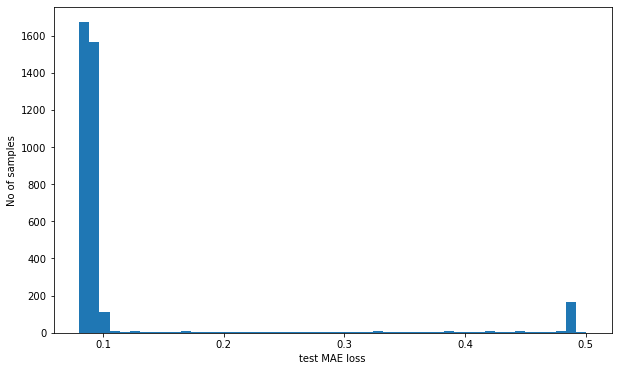

In [67]:
# plot the prediction mae loss
fig, ax = plt.subplots(figsize=(10, 6))

# plot the histogram
ax.hist(test_mae_loss, bins=50)

# set x and y labels
ax.set_xlabel("test MAE loss")
ax.set_ylabel("No of samples");

Identify all samples that have an MAE loss greater than a given threshold by creating a boolean array called anomalies.

In [68]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# NUmber of anomalies.
np.sum(anomalies)

405

Find all time steps in the time series that have window_size consecutive samples before and after them that are anomalies (i.e. have an MAE loss greater than the threshold). The time steps that meet this criterion are stored in a list called inds.

In [69]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [70]:
# Subset the time series data using the indices in inds and store it in a new data frame called df_subset.
df_subset = df_daily_jumpsup.iloc[inds]

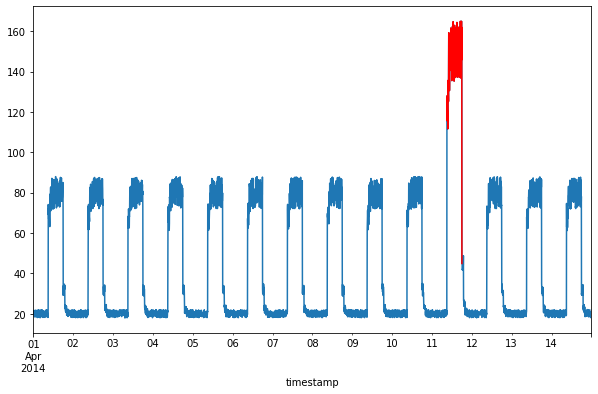

In [71]:
# Plot the original time series data and the subset of the time series data that contain anomalies.
fig, ax = plt.subplots(figsize=(10, 6))

df_daily_jumpsup.plot(legend=False, ax=ax)

# plot anomalies in red
df_subset.plot(legend=False, ax=ax, color="r");

## Conclusion

The process for identifying anomalies involves computing the MAE loss for each sample in a test set, setting a threshold for identifying anomalies, and then identifying time steps in the time series data that have window_size consecutive samples before and after them that have an MAE loss greater than the threshold. The resulting subset of the time series data is then plotted to visualize the identified anomalies.

From looking at the above plot, we can see that the anomaly has been corrected predicted. 

It is important to note that this code is only a part of the process for identifying anomalies in a time series data. In order to effectively identify anomalies, it may be necessary to try different values for the threshold and window size, as well as to consider other methods for identifying anomalies in the time series data. It is also possible that additional preprocessing or feature engineering steps may be necessary to improve the accuracy of the anomaly detection process.

***

## End